In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, GRU, Dropout
from keras.models import Sequential
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.losses import MeanAbsolutePercentageError
import tensorflow as tf

2022-11-10 16:03:49.654308: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<AxesSubplot:>

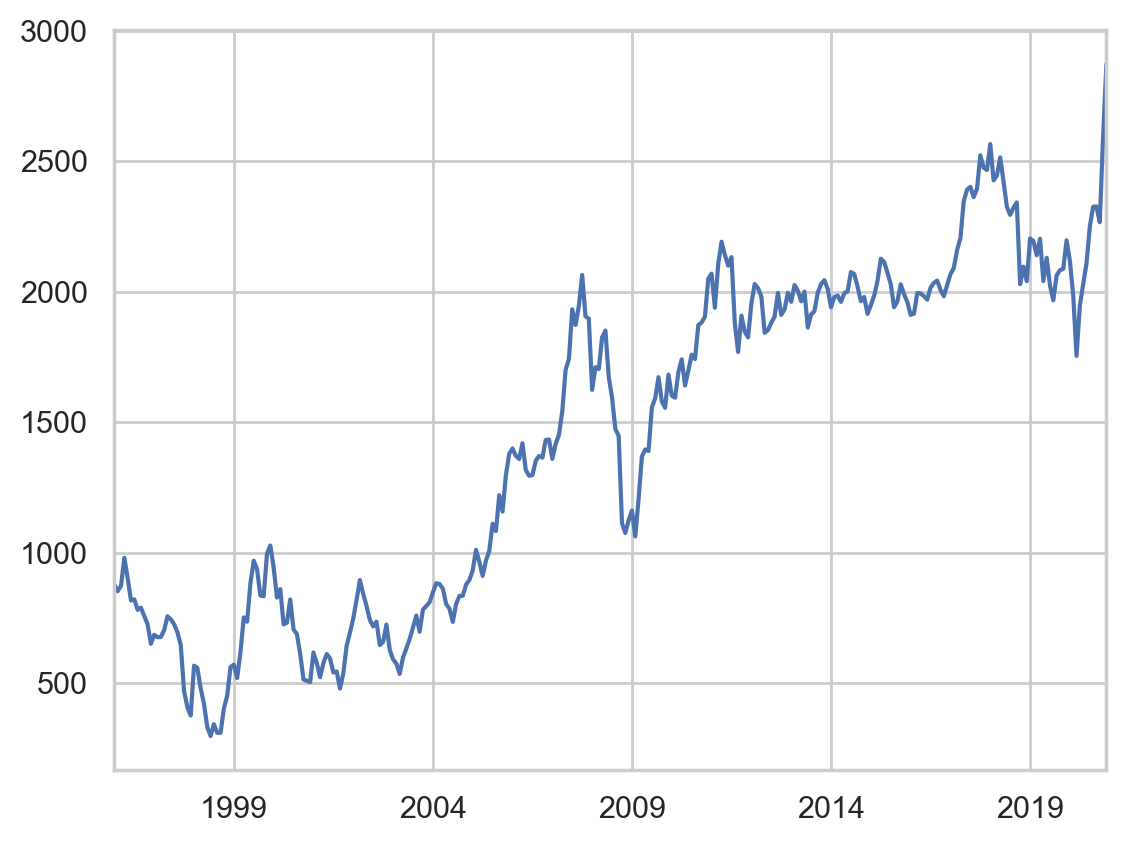

In [2]:
kospi = pd.read_csv('코스피지수.csv')
kospi.index = pd.date_range("1996-01-01", "2020-12-01", freq="MS")
kospi['종가'].plot()

<AxesSubplot:>

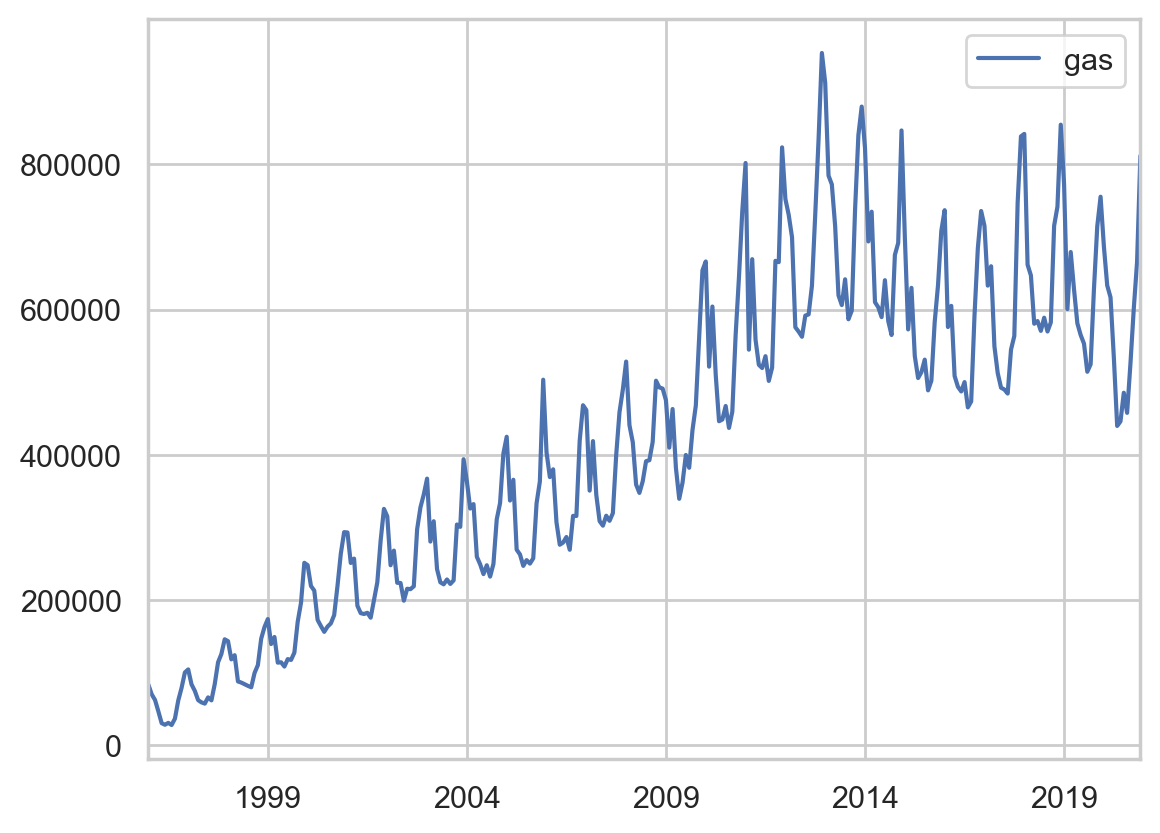

In [3]:
data = pd.read_csv('월별공급량및비중all.csv')
ind = data["도시가스(톤)_산업용"]
ind.index = pd.date_range("1996-01-01", "2020-12-01", freq="MS")
ind = ind.to_frame()
ind.columns=['gas']
ind.index = pd.DatetimeIndex(ind.index.values,
                               freq=ind.index.inferred_freq)
ind.plot()

In [4]:
ind['kospi'] = kospi['종가']
ind

,gas,kospi
1996-01-01,83809.0,878.82
1996-02-01,70427.0,852.83
1996-03-01,62652.0,874.16
1996-04-01,47050.0,980.90
1996-05-01,30709.0,903.09
...,...,...
2020-08-01,457970.0,2326.17
2020-09-01,525619.0,2327.89
2020-10-01,600890.0,2267.15
2020-11-01,665901.0,2591.34


<AxesSubplot:xlabel='연도'>

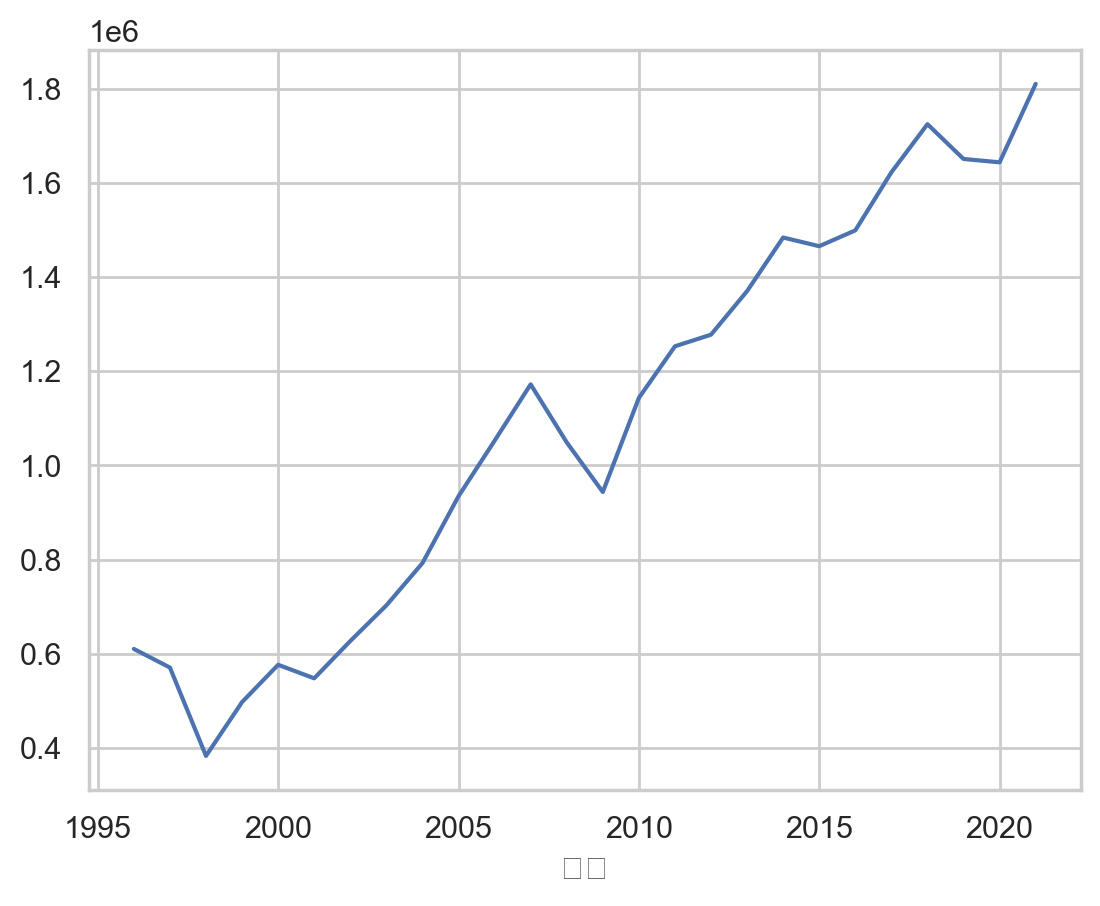

In [5]:
gdp = pd.read_csv('../kogas_exdata/GDP.csv')
gdp.index = gdp['연도']
gdp['원자료'].plot()

<AxesSubplot:>

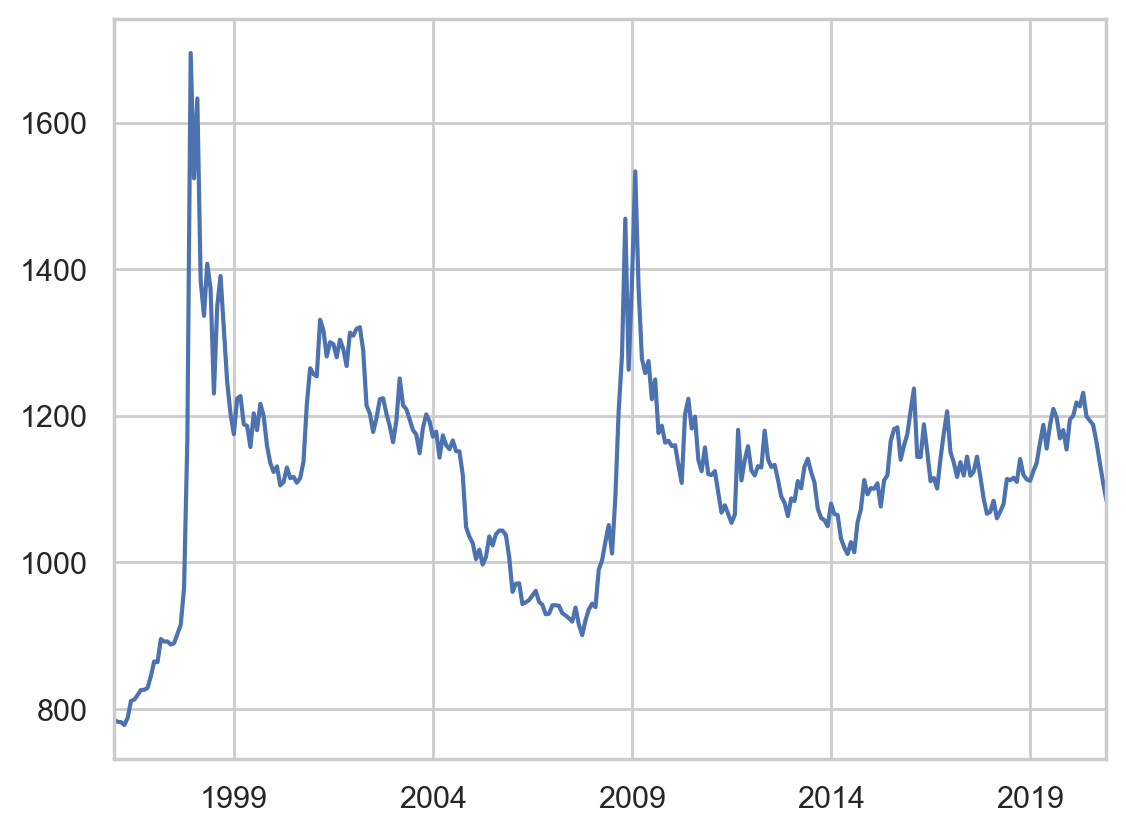

In [6]:
dollar = pd.read_csv('USD_KRW 내역.csv')
dollar.index = pd.date_range("1996-01-01", "2020-12-01", freq="MS")
dollar['종가'].plot()

In [7]:
ind['dollar'] = dollar['종가']
ind

,gas,kospi,dollar
1996-01-01,83809.0,878.82,785.25
1996-02-01,70427.0,852.83,782.55
1996-03-01,62652.0,874.16,782.25
1996-04-01,47050.0,980.90,778.25
1996-05-01,30709.0,903.09,787.95
...,...,...,...
2020-08-01,457970.0,2326.17,1187.94
2020-09-01,525619.0,2327.89,1164.65
2020-10-01,600890.0,2267.15,1136.49
2020-11-01,665901.0,2591.34,1109.32


<AxesSubplot:>

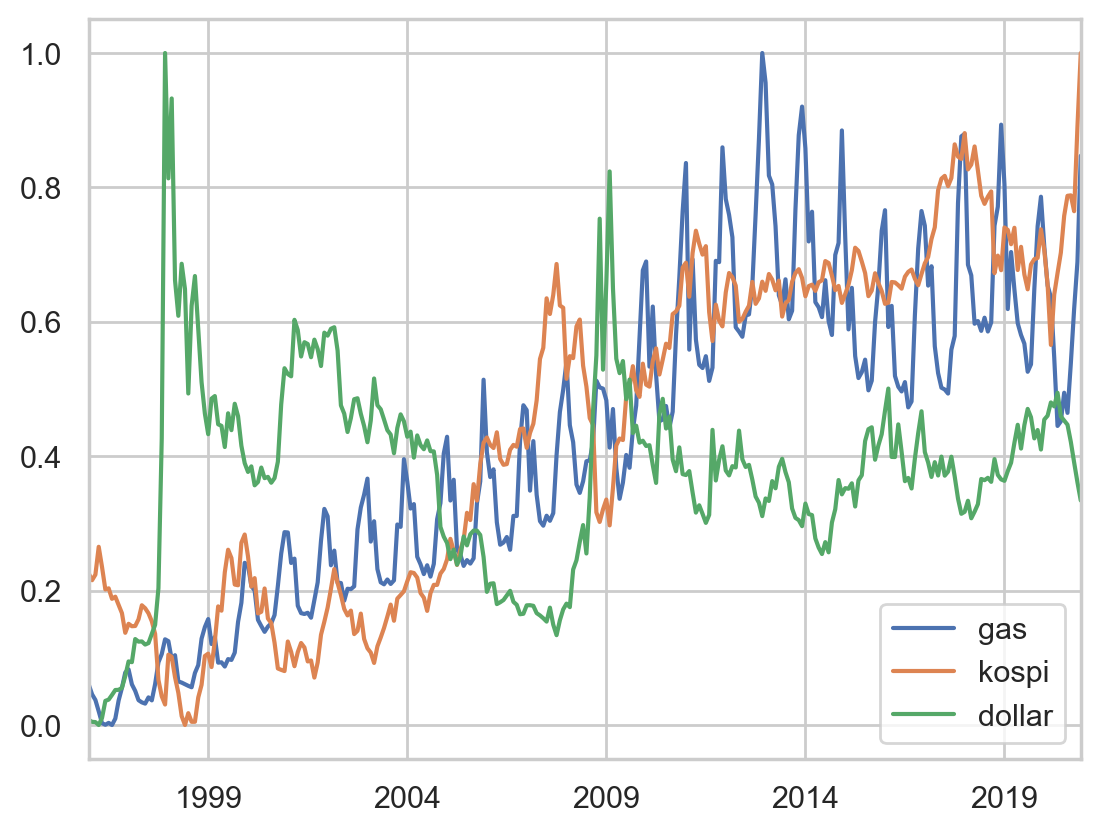

In [8]:
sc = MinMaxScaler()

ind_sc = sc.fit_transform(ind)
ind_sc = pd.DataFrame(ind_sc, index=ind.index, columns=['gas','kospi','dollar'])
ind_sc.plot()